# Densidad espectral de potencias
## Datos de intensidad de rayos cósmicos CRI Pierre Auger

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import astropy
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, get_body
import astropy.units as u

from augerscalerpy.scaler_cleaning import scaler_clean, plot_data
from augerscalerpy.plot_config import configure_plots

from scipy.fft import fft, fftshift
from scipy.signal import correlate
from scipy.stats import norm

import matplotlib.ticker as mticker


In [2]:
#Preparación del dataset
#base = pd.read_csv("scaler_datasets/auger_cleaned_300s.csv") scaler_300s_FINAL
base = pd.read_csv("scaler_datasets/auger_cleaned_300s.csv")
base['date'] = pd.to_datetime(base['date'])

#base.set_index('date', inplace=True)
#base = base.resample('1H').mean() #ESTO GENERA VALORES NaN

In [3]:
#base['counts/s'] = base['ScalerCorr'].rolling(window=12).mean()

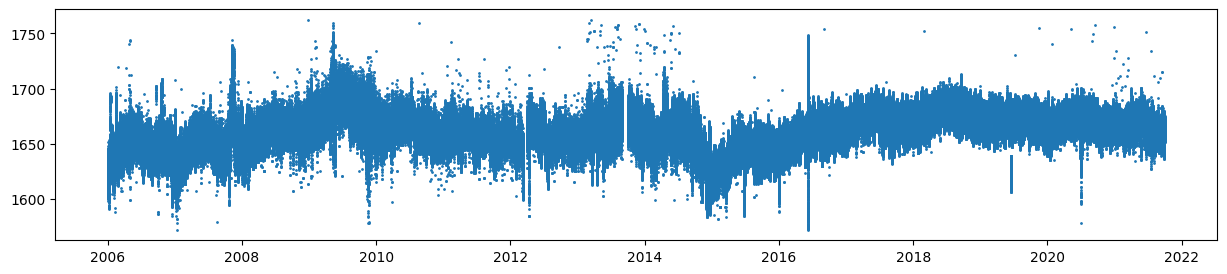

In [3]:
base.reset_index(inplace=False)
#date= base['date'].values
#counts=base['counts/s'].values
plt.figure(figsize=(15, 3))
#plt.scatter(date,counts,s=1)
plt.scatter(base['date'],base['counts/s'],s=1)
plt.show()

In [4]:
base = base.sort_values('date')

/home/jennifer/Documentos/msc_tesis/scaler_for_solar_analysis/augerscalerpy/scaler_fft.py:76: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies  # Calculamos el período en segundos


Hay valores nulos en el DataFrame.
Aún hay valores nulos en el DataFrame.
Pero ya fueron resueltos :)


Ingresa un valor de periodo (en días) o escribe 'fin' para detenerte:  1
Ingresa un valor de periodo (en días) o escribe 'fin' para detenerte:  27
Ingresa un valor de periodo (en días) o escribe 'fin' para detenerte:  365.25
Ingresa un valor de periodo (en días) o escribe 'fin' para detenerte:  fin


Valores ingresados: [1.0, 27.0, 365.25]


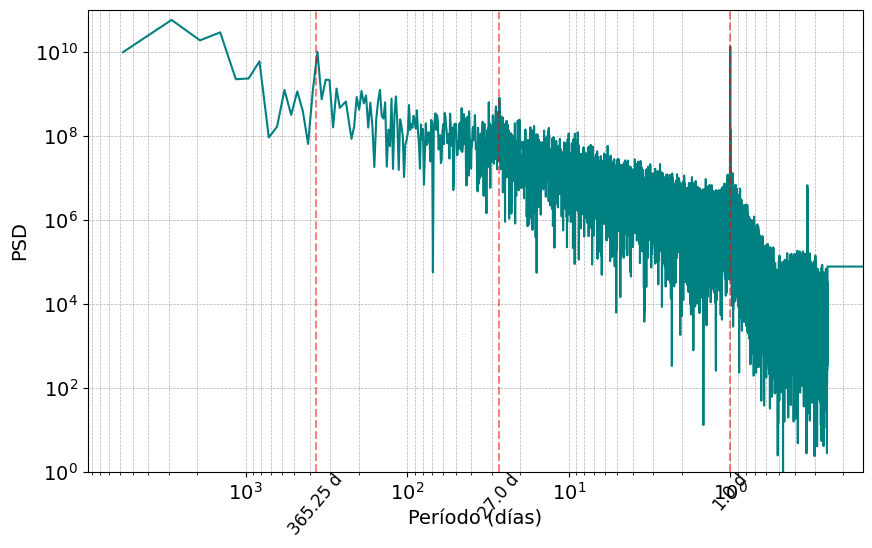

In [5]:
scaler_smooth= base.copy()
scaler_smooth.set_index('date',inplace=True)
scaler_smooth = scaler_smooth.resample('3H').mean()
scaler_smooth.reset_index(inplace=True)
scaler_smooth['counts/s'] = scaler_smooth['counts/s'].rolling(window=4).mean() #ERA 4
#PARA UN SAMPLING DE 300S -> 72 = 6 horas 144=12 horas , 192=16 horas
## NOS QUEDAMOS CON 16 HORAS DE PROMEDIO MOVIL....

scaler_smooth.set_index('date', inplace=True)

# INTERPOLAR LOS VALORES NaN generados luego del ROLLING
if scaler_smooth.isnull().values.any():
    print("Hay valores nulos en el DataFrame.")
    # Reemplazar los ceros por NaN
    scaler_smooth.replace(0, np.nan, inplace=True)
    # Realizar la interpolación
    scaler_smooth.interpolate(method='nearest', limit_direction='both', inplace=True)
if scaler_smooth.isnull().values.any():
    print("Aún hay valores nulos en el DataFrame.")
    #scaler_smooth.replace(np.nan, np.nan, inplace=True)
    scaler_smooth.fillna(scaler_smooth.mean(), inplace=True)
    print("Pero ya fueron resueltos :)")
else:
    print("DataFrame LISTO")
### VAMOS A APLICAR EL SCRIPT DE TRSNFORMADA DE FOURIER
scaler_smooth.reset_index(inplace=True)
from augerscalerpy.scaler_fft import scalerfft_period, scalerfft_frec

x, y = scalerfft_period(10800,scaler_smooth,1,'fft_auger','counts/s')

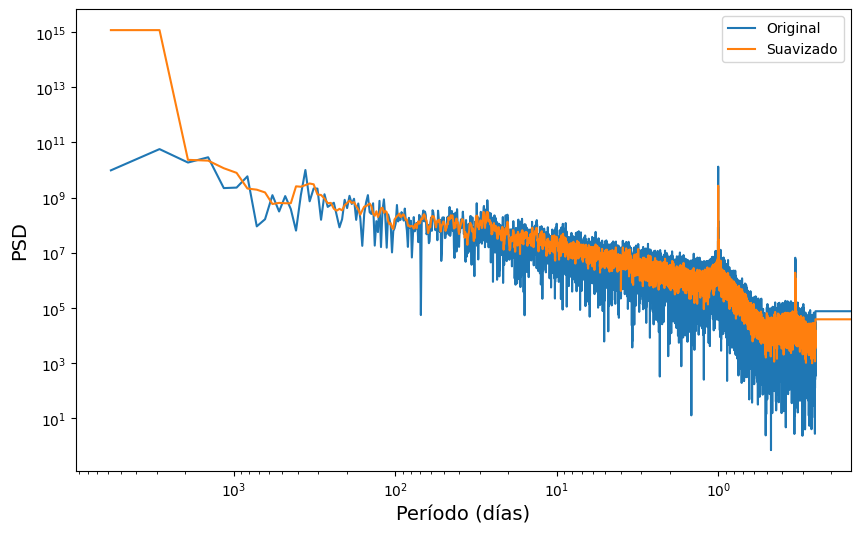

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Tus datos
#x = periods_days_sorted
#y = power_spectrum_sorted

# Definir el tamaño de la ventana para el promedio móvil
window_size =5

# Calcular el promedio móvil
y_smooth = np.convolve(y, np.ones(window_size)/window_size, mode='same')

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Original')
plt.plot(x, y_smooth, label='Suavizado', linestyle='-')
plt.yscale('log')
plt.xscale('log')
plt.gca().invert_xaxis()
plt.xlabel('Período (días)', fontsize=14)
plt.ylabel('PSD', fontsize=14)
plt.legend()
plt.show()


/home/jennifer/Documentos/msc_tesis/scaler_for_solar_analysis/augerscalerpy/scaler_fft.py:78: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies  # Calculamos el período en segundos


Hay valores nulos en el DataFrame.
Aún hay valores nulos en el DataFrame.
Pero ya fueron resueltos :)


Ingresa un valor de periodo (en días) o escribe 'fin' para detenerte:  1
Ingresa un valor de periodo (en días) o escribe 'fin' para detenerte:  27
Ingresa un valor de periodo (en días) o escribe 'fin' para detenerte:  365.25
Ingresa un valor de periodo (en días) o escribe 'fin' para detenerte:  fin


Valores ingresados: [1.0, 27.0, 365.25]


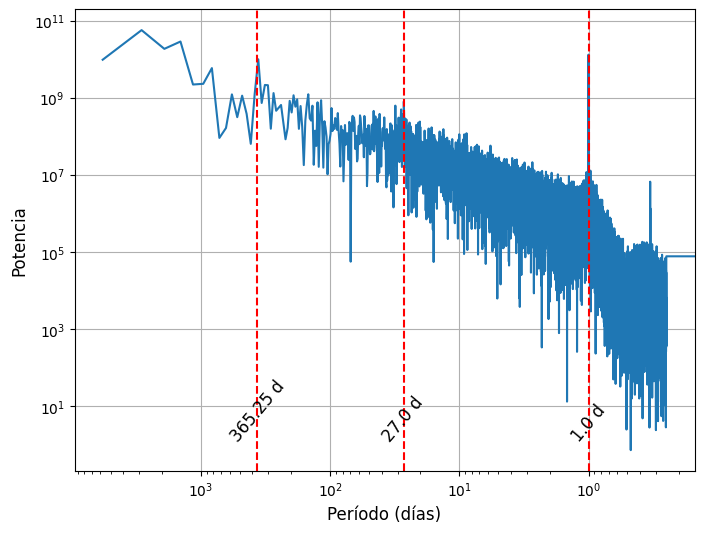

In [5]:
scaler_smooth= base.copy()
scaler_smooth.set_index('date',inplace=True)
scaler_smooth = scaler_smooth.resample('3H').mean()
scaler_smooth.reset_index(inplace=True)
scaler_smooth['counts/s'] = scaler_smooth['counts/s'].rolling(window=4).mean() #ERA 4
#PARA UN SAMPLING DE 300S -> 72 = 6 horas 144=12 horas , 192=16 horas
## NOS QUEDAMOS CON 16 HORAS DE PROMEDIO MOVIL....

scaler_smooth.set_index('date', inplace=True)

# INTERPOLAR LOS VALORES NaN generados luego del ROLLING
if scaler_smooth.isnull().values.any():
    print("Hay valores nulos en el DataFrame.")
    # Reemplazar los ceros por NaN
    scaler_smooth.replace(0, np.nan, inplace=True)
    # Realizar la interpolación
    scaler_smooth.interpolate(method='nearest', limit_direction='both', inplace=True)
if scaler_smooth.isnull().values.any():
    print("Aún hay valores nulos en el DataFrame.")
    #scaler_smooth.replace(np.nan, np.nan, inplace=True)
    scaler_smooth.fillna(scaler_smooth.mean(), inplace=True)
    print("Pero ya fueron resueltos :)")
else:
    print("DataFrame LISTO")
### VAMOS A APLICAR EL SCRIPT DE TRSNFORMADA DE FOURIER
scaler_smooth.reset_index(inplace=True)
from augerscalerpy.scaler_fft import scalerfft_period, scalerfft_frec

scalerfft_period(10800,scaler_smooth,1,'fft_PRUEBAMUGRE_smooth','counts/s')

##### El método de Blackman-Turkey es un método de estimación espectral que se utiliza para calcular la densidad espectral de potencia (PSD) de una serie de tiempo1. Este método implica la estimación de los coeficientes de autocorrelación utilizando una secuencia de datos en ventana, y luego se aplica la transformada de Fourier a la correlación en ventana para proporcionar la PSD estimada1.
##### En Python, puedes usar la función 
- numpy.blackman o
- scipy.signal.windows.blackman para generar una ventana de Blackman:

/tmp/ipykernel_35724/1181518302.py:24: RuntimeWarning: divide by zero encountered in divide
  periods_in_days = 1.0 / (frequencies * 86400)


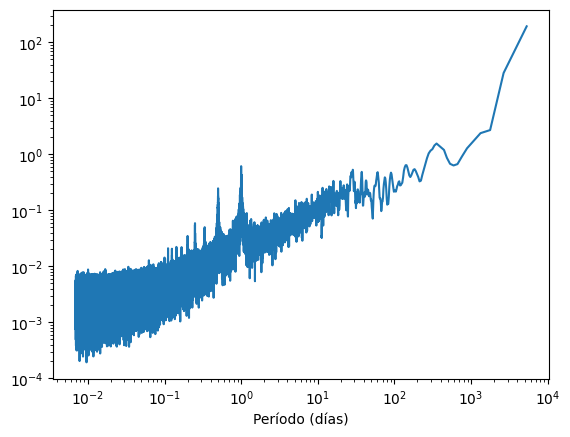

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import convolve

# Asume que 'base' es tu DataFrame de pandas y 'counts/s' es tu columna de series de tiempo
sig = base['counts/s'].values

# Aplica la ventana de Blackman
window = np.blackman(sig.shape[0])
sig = sig * window

# Realiza la transformada de Fourier y calcula el espectro de magnitud
fft_vals = fft(sig)
magnitude = 2.0*np.abs(fft_vals / sig.shape[0])

# Genera las frecuencias correspondientes al FFT
# Asume que tu muestreo es de 10800 segundos por dato
Ts = 300  # Tiempo de muestreo en segundos
Fs = 1.0 / Ts  # Frecuencia de muestreo
frequencies = np.linspace(0.0, Fs/2, sig.shape[0]//2)

# Convierte las frecuencias a períodos en días
periods_in_days = 1.0 / (frequencies * 86400)

# Define la ventana móvil de 10 puntos para suavizar la PSD
window_size = 5
smoothed_magnitude = convolve(magnitude[:sig.shape[0]//2], np.ones(window_size)/window_size, mode='valid')

# Grafica el espectro de magnitud suavizado
plt.plot(periods_in_days[:len(smoothed_magnitude)], smoothed_magnitude)
plt.xlabel('Período (días)')


# Grafica el espectro de magnitud
#plt.plot(periods_in_days, magnitude[:sig.shape[0]//2])
#plt.xlabel('Período (días)')
plt.yscale('log')
plt.xscale('log')
plt.show()


/tmp/ipykernel_12252/4029083412.py:26: RuntimeWarning: divide by zero encountered in divide
  periods_in_days = 1.0 / (frequencies * 86400)


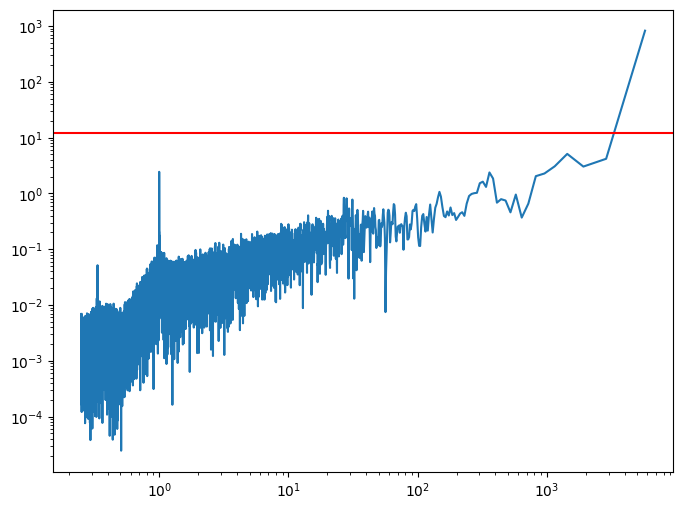

In [19]:
########### APLICANDO UNA VENTANA DE HANNING A LA SERIE DE TIEMPO:


import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Asume que 'scaler_smooth' es tu DataFrame de pandas y 'counts/s' es tu columna de series de tiempo
sig = scaler_smooth['counts/s'].values

# Aplica la ventana de Hanning
window = np.hanning(sig.shape[0])
sig = sig * window

# Realiza la transformada de Fourier y calcula el espectro de magnitud
fft_vals = fft(sig)
magnitude = 2.0*np.abs(fft_vals / sig.shape[0])

# Genera las frecuencias correspondientes al FFT
# Asume que tu muestreo es de 14400 segundos por dato
Ts = 10800  # Tiempo de muestreo en segundos
Fs = 1.0 / Ts  # Frecuencia de muestreo
frequencies = np.linspace(0.0, Fs/2, sig.shape[0]//2)

# Convierte las frecuencias a períodos en días
periods_in_days = 1.0 / (frequencies * 86400)

# Calcula el intervalo de confianza del 95%
confidence_interval = norm.interval(0.80, loc=np.mean(magnitude), scale=np.std(magnitude))


# Grafica el espectro de magnitud
plt.plot(periods_in_days, magnitude[:sig.shape[0]//2])

# Agrega la línea del límite superior del intervalo de confianza a la gráfica
plt.axhline(y=confidence_interval[1], color='r', linestyle='-')

plt.yscale('log')
plt.xscale('log')
plt.show()


/tmp/ipykernel_12252/1433268816.py:23: RuntimeWarning: divide by zero encountered in divide
  periods_in_days = 1.0 / (frequencies * 86400)


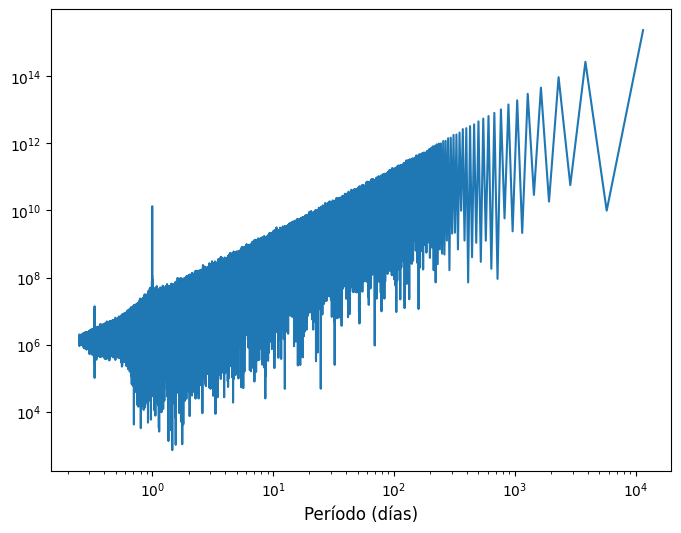

In [8]:
############# APLICANDO EL TEOREMA DE Wiener-Khinchin A LA SERIE DE DATOS
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import correlate

# Asume que 'scaler_smooth' es tu DataFrame de pandas y 'counts/s' es tu columna de series de tiempo
sig = scaler_smooth['counts/s'].values

# Calcula la función de autocorrelación de la señal
autocorr = correlate(sig, sig, mode='full')

# Realiza la transformada de Fourier de la función de autocorrelación para obtener la PSD
psd = np.abs(fft(autocorr))

# Genera las frecuencias correspondientes a la PSD
# Asume que tu muestreo es de 14400 segundos por dato
Ts = 10800  # Tiempo de muestreo en segundos
Fs = 1.0 / Ts  # Frecuencia de muestreo
frequencies = np.linspace(0.0, Fs/2, psd.shape[0]//2)

# Convierte las frecuencias a períodos en días
periods_in_days = 1.0 / (frequencies * 86400)

# Grafica la PSD
plt.plot(periods_in_days, psd[:psd.shape[0]//2])
#plt.plot(periods_in_days, psd)
plt.xlabel('Período (días)')
plt.yscale('log')
plt.xscale('log')
plt.show()


In [5]:
df= base.copy()


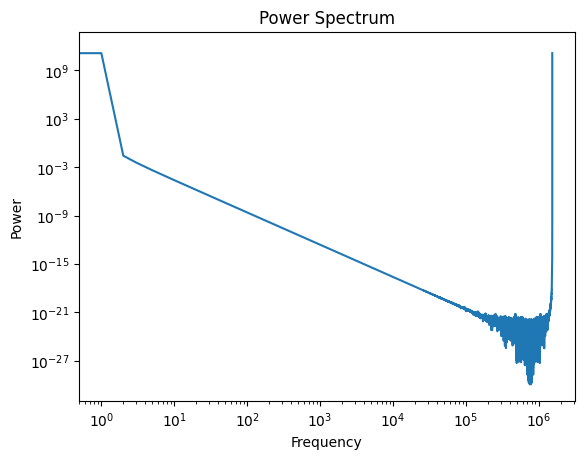

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
# Asegúrate de que la columna 'counts/s' esté presente en tu DataFrame
# base = pd.read_csv('nombre_del_archivo.csv')

# Calcular la autocorrelación de la señal
autocorr = base['counts/s'].autocorr()

# Aplicar la ventana de Hanning
window = np.hanning(len(base['counts/s']))

# Enventanar la secuencia de autocorrelación
autocorr_windowed = autocorr * window

# Calcular la transformada de Fourier de la secuencia de autocorrelación enventanada
spectrum = np.fft.fft(autocorr_windowed)

# Calcular la densidad espectral de potencia
power_spectrum = np.abs(spectrum) ** 2

# Graficar el espectro de potencia
plt.plot(power_spectrum)
plt.title('Power Spectrum')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()



/tmp/ipykernel_39841/485402202.py:14: DeprecationWarning: Importing blackman from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.blackman' or the convenience function 'scipy.signal.get_window' instead.
  window = blackman(len(autocorr))


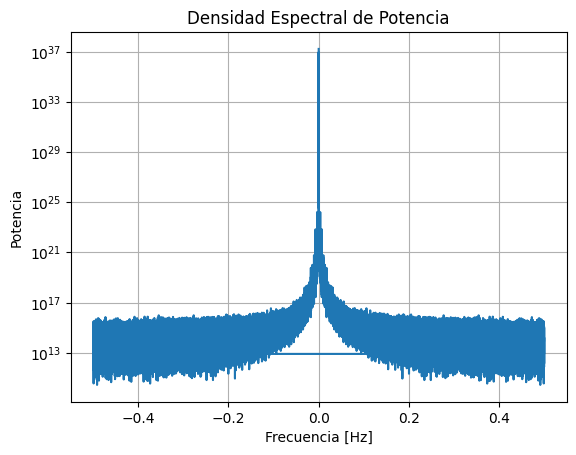

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import blackman

# Supongamos que tienes un DataFrame llamado 'base' y quieres calcular la DEP para 'counts/s'
# Asegúrate de reemplazar esto con tus datos reales
base = df.copy()

# Calcula la función de autocorrelación usando numpy.correlate
autocorr = np.correlate(base['counts/s'], base['counts/s'], mode='full')

# Aplica la ventana de Blackman
window = blackman(len(autocorr))
autocorr_windowed = autocorr * window

# Calcula la Transformada de Fourier
psd = np.abs(np.fft.fft(autocorr_windowed))**2

# Calcula las frecuencias correspondientes
freqs = np.fft.fftfreq(len(psd), 1)  # Reemplaza el '1' con tu intervalo de muestreo

# Grafica la DEP
plt.semilogy(freqs, psd)
plt.title('Densidad Espectral de Potencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia')
plt.grid(True)
plt.show()


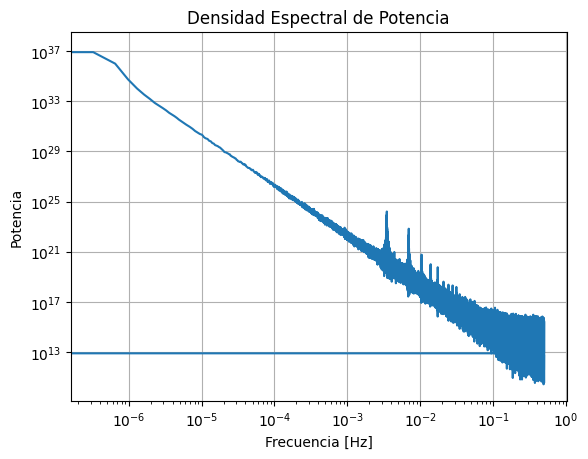

In [12]:
plt.plot(freqs, psd)
plt.title('Densidad Espectral de Potencia')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Potencia')
plt.grid(True)
plt.show()


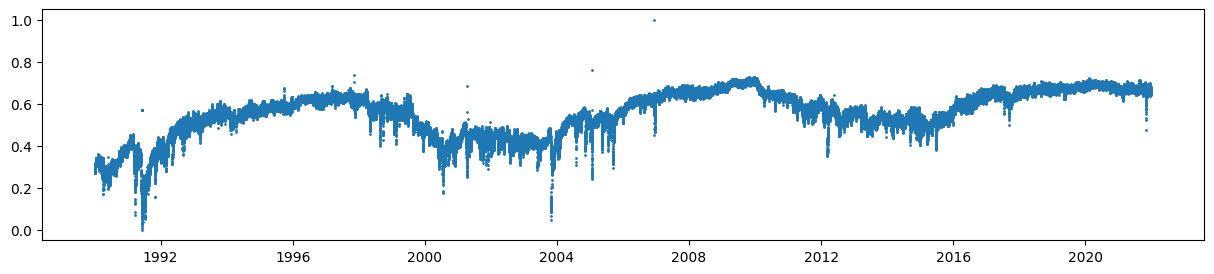

In [39]:
# CÓMO SE VE ESTO CON OTRO DATAFRAME????
oulu = pd.read_csv("nm_data/CRI_auger_NM_3H_NORM.csv")
oulu['date'] = pd.to_datetime(oulu['date'])
oulu.reset_index(inplace=False)
#date= base['date'].values
#counts=base['counts/s'].values
plt.figure(figsize=(15, 3))
#plt.scatter(date,counts,s=1)
plt.scatter(oulu['date'],oulu['oulu'],s=1)
plt.show()

Hay valores nulos en el DataFrame.
Aún hay valores nulos en el DataFrame.
Pero ya fueron resueltos :)
Valores ingresados: []


/home/jennifer/Documentos/msc_tesis/scaler_for_solar_analysis/augerscalerpy/scaler_fft.py:73: RuntimeWarning: divide by zero encountered in divide
  periods = 1 / frequencies  # Calculamos el período en segundos


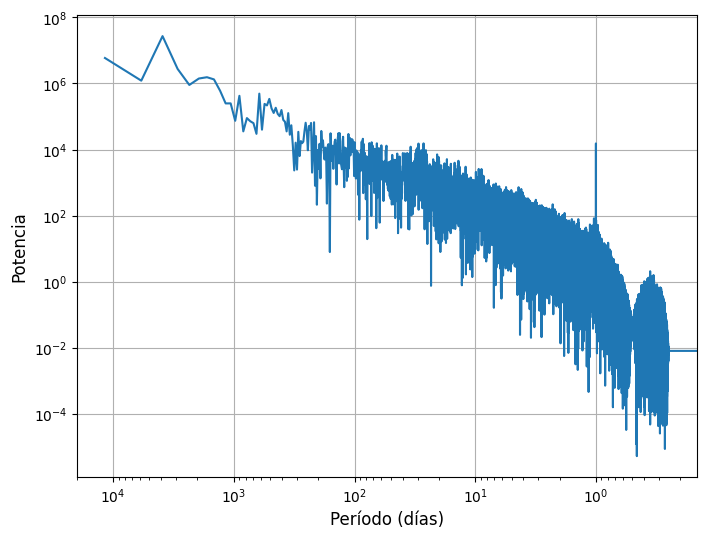

In [40]:
scaler_smooth= oulu.copy()
scaler_smooth.set_index('date',inplace=True)
#scaler_smooth = scaler_smooth.resample('6H').mean()
scaler_smooth.reset_index(inplace=True)
scaler_smooth['oulu'] = scaler_smooth['oulu'].rolling(window=4).mean() 
#PARA UN SAMPLING DE 300S -> 72 = 6 horas 144=12 horas , 192=16 horas
## NOS QUEDAMOS CON 16 HORAS DE PROMEDIO MOVIL....

scaler_smooth.set_index('date', inplace=True)

# INTERPOLAR LOS VALORES NaN generados luego del ROLLING
if scaler_smooth.isnull().values.any():
    print("Hay valores nulos en el DataFrame.")
    # Reemplazar los ceros por NaN
    scaler_smooth.replace(0, np.nan, inplace=True)
    # Realizar la interpolación
    scaler_smooth.interpolate(method='nearest', limit_direction='both', inplace=True)
if scaler_smooth.isnull().values.any():
    print("Aún hay valores nulos en el DataFrame.")
    #scaler_smooth.replace(np.nan, np.nan, inplace=True)
    scaler_smooth.fillna(scaler_smooth.mean(), inplace=True)
    print("Pero ya fueron resueltos :)")
else:
    print("DataFrame LISTO")
### VAMOS A APLICAR EL SCRIPT DE TRSNFORMADA DE FOURIER
scaler_smooth.reset_index(inplace=True)
from augerscalerpy.scaler_fft import scalerfft_period, scalerfft_frec

scalerfft_period(10800,scaler_smooth,0,'fft_PRUEBAMUGRE_smooth','oulu')

In [32]:
Ts = 10800; # Tiempo de muestreo (s)
Fs = 1/Ts; # Frecuencia de muestreo, Frecuencia de muestreo (Hz)
f0 = 4.63e-7; # Frecuencia de interés (Hz)
duraT = 1; # Calcular el eje del tiempo
dt = 1/Fs;
tAxis = dt:dt: (duraT-dt);
y = cos (2*pi*f0*tAxis) + 2*sin (2*pi*10*tAxis);
y=y';
L = length (y); # Longitud de la ventana de FFT
nfft = 2^nextpow2 (L); # Longitud de la transformada
y_HannWnd = y.*hanning (L);
Ydft_HannWnd = fft (y_HannWnd,nfft)/L; # en todas las frecuencias excepto cero y Nyquist
mYdft = abs (Ydft_HannWnd);
mYdft = mYdft (1:nfft/2+1);
mYdft (2:end-1) = 2* mYdft (2:end-1);
f = Fs/2*linspace (0,1,nfft/2+1);


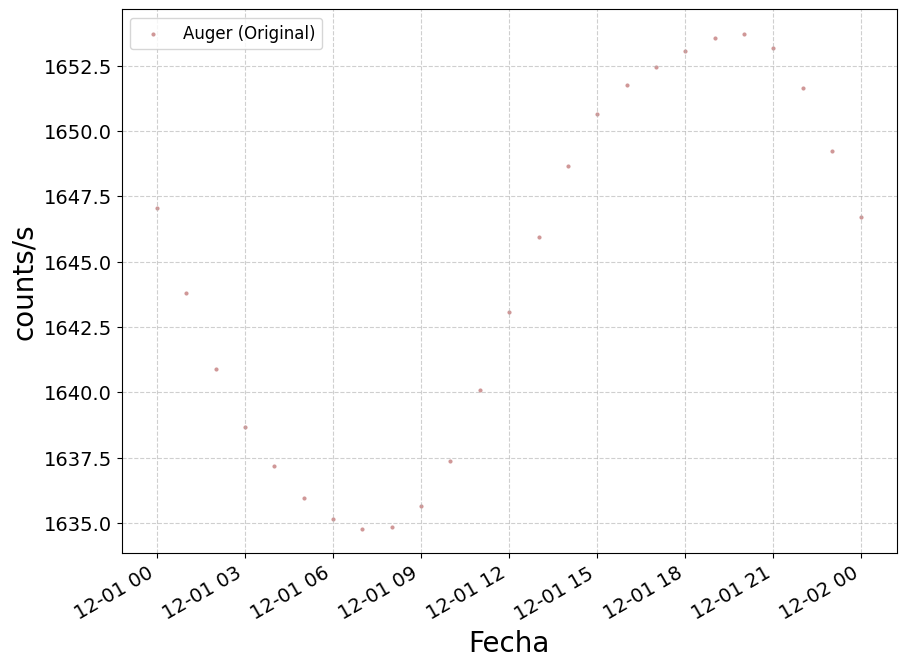

In [104]:
# Convertir la columna 'date' a datetime si aún no lo es
#base['date'] = pd.to_datetime(base['date'])

# Definir las fechas de inicio y fin
start_date = "2006-12-01"
end_date = "2006-12-2"

# Filtrar las fechas para el rango que deseas comparar
mask_300s = (scaler_smooth['date'] >= start_date) & (scaler_smooth['date'] <= end_date)
filtered_scaler300s = scaler_smooth.loc[mask_300s]

# Graficar los datos en el mismo plot
plt.figure(figsize=(10, 8))

plt.scatter(filtered_scaler300s['date'], filtered_scaler300s['counts/s'], color='darkred', linewidth=2, label='Auger (Original)', s=1, alpha=0.4)

plt.xlabel('Fecha', fontsize=20)  
plt.ylabel('counts/s', fontsize=20)  

plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

plt.grid(True, linestyle='--', alpha=0.6)  

plt.gcf().autofmt_xdate()

plt.legend()
#plt.savefig('dayofdata_3600s_SMOOTH.png')
plt.show()
